In [1]:
import model, BeamFeatures
import torch
import matplotlib.pyplot as plt, numpy as np
# m = model.GNNModel(outdim=4, edge_input=8, node_input=4)
m = model.GNNModel(outdim=4)
checkpoint = torch.load('test3.cpt')
m.load_state_dict(checkpoint['model_state_dict'])
# bf = BeamFeatures.BeamFeatures('/home/jake/GNN_work/data/1_9_23_pdgs/merged_val.h5', style='pdgs', ave_charge=True)
bf = BeamFeatures.BeamFeatures('/home/jake/GNN_work/data/1_9_23_pdgs/merged_val.h5', style='pdgs')

In [2]:
from torch_geometric.loader import DataLoader
loader = DataLoader(bf,
                    shuffle     = True,
                    num_workers = 0,
                    batch_size  = 64
                    )

In [3]:
# data = next(iter(loader))


In [4]:
import numpy as np

In [5]:
from train import get_confusion

In [6]:
get_confusion?

In [7]:
conf = np.zeros((4,4))

In [8]:
# for data in loader:
#     x = m(data, data.batch)
#     conf += get_confusion(data, x)

In [9]:
new_conf = conf / np.sum(conf, axis=1)

/tmp/ipykernel_33894/1312150843.py:1: RuntimeWarning: invalid value encountered in divide
  new_conf = conf / np.sum(conf, axis=1)


In [10]:
conf

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [11]:
for i in range(len(new_conf)):
    print(np.sum(new_conf[i,:]))
    new_conf[i,:] /= np.sum(new_conf[i,:])

nan
nan
nan
nan


array([[nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan]])

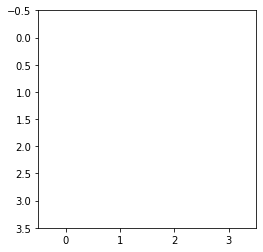

In [12]:
plt.imshow(new_conf)
new_conf

In [13]:
for i in range(len(new_conf2)):
    print(np.sum(new_conf2[:,i]))
    new_conf[:,i] /= np.sum(new_conf[:,i])

NameError: name 'new_conf2' is not defined

In [14]:
plt.imshow(new_conf2)
new_conf2

NameError: name 'new_conf2' is not defined

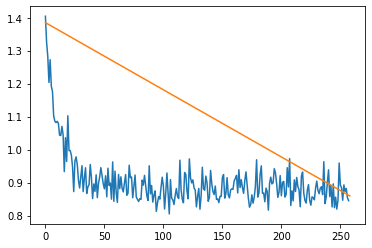

In [25]:
import h5py as h5
f = h5.File('try5_pdgs.h5', 'r')

plt.plot(f['losses'][:])
plt.plot([0, len(f['losses'])], f['test_ave_losses'][:])

In [27]:
f['losses'][:].reshape(1,-1).sha

array([[1.40431356, 1.3250972 , 1.28276753, 1.20365608, 1.27240765,
        1.19207478, 1.17591977, 1.10206473, 1.08601904, 1.08184421,
        1.08582461, 1.07979834, 1.04394579, 1.04275358, 1.07034361,
        1.04523873, 0.93340236, 1.036075  , 0.96414942, 1.10254753,
        0.99721587, 0.99712026, 0.98324847, 0.94760996, 0.87279522,
        0.96522987, 0.97797221, 0.9552418 , 0.90715152, 0.88377661,
        0.91831154, 0.95131212, 0.87284768, 0.91301227, 0.94502729,
        0.86701423, 0.8872782 , 0.89397657, 0.95511699, 0.91427314,
        0.85156769, 0.89585108, 0.87344879, 0.92365807, 0.85448593,
        0.8980214 , 0.91755289, 0.94547516, 0.92013341, 0.89688289,
        0.88127309, 0.9207142 , 0.85705024, 0.94367325, 0.89155287,
        0.89900255, 0.84994364, 0.96275872, 0.84335995, 0.93469048,
        0.86912572, 0.84004891, 0.92449903, 0.88178247, 0.91768527,
        0.88278687, 0.87181461, 0.89950478, 0.92435741, 0.86163527,
        0.86790782, 0.95283335, 0.91498309, 0.91